# **"Mobile Usage Visual Search Project**
## **1 CHECKING FOR DATA QUALITY**

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
dataset = pd.read_csv("/content/MASTER_PhonesmartdataAll_CCI_AdvStats.csv")


# Present Data in a table

In [2]:
dataset

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,Device,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single
0,2022,,2,4,49,70,,,,1178.700000,1216.387500
1,2021,37,2,8,44,33,,,,946.470000,785.597500
2,2022,,1,,,,,,,1182.741667,950.900000
3,2022,,1,,,,,,,1778.950000,984.333333
4,2022,,2,,,,,,,521.500000,503.000000
...,...,...,...,...,...,...,...,...,...,...,...
543,2020,38,1,3,56,39,iPhone,507,,915.785917,747.883194
544,2020,27,2,5,64,77,iPhone,267,,877.783333,720.729583
545,2020,36,2,2,46,43,iPhone,610,,1211.483333,1049.979167
546,2020,31,2,4,67,69,iPhone,558,,899.774583,845.612083


# Check the shape of data

In [3]:
dataset.shape

(548, 11)

In [4]:
# Check if the data has null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       548 non-null    int64  
 1   Age                        548 non-null    object 
 2   GenderNum                  548 non-null    object 
 3   AutismQuotient             548 non-null    object 
 4   STAI                       548 non-null    object 
 5   BRIEF_Total                548 non-null    object 
 6   Device                     548 non-null    object 
 7   DailyAvgMins               548 non-null    object 
 8   DailyAvePickups            548 non-null    object 
 9   VS_RT_correct_Conjunction  548 non-null    float64
 10  VS_RT_correct_Single       548 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 47.2+ KB


In [5]:
# Idenify missing values from each column
missing_values = dataset.isnull().sum()
print(missing_values)

Year                         0
Age                          0
GenderNum                    0
AutismQuotient               0
STAI                         0
BRIEF_Total                  0
Device                       0
DailyAvgMins                 0
DailyAvePickups              0
VS_RT_correct_Conjunction    0
VS_RT_correct_Single         0
dtype: int64


## **Replace with NaN & Recheck for Missing values**

The basic check for missing values using dataset.isnull().sum() shows no missing values in any of the columns of the dataset. However, as we observed from the dataframe preview, some columns contain empty strings or spaces which might not be recognized as missing values by this method.

To accurately identify these as missing, we will replace empty strings or spaces with NaN and then recheck for missing values. #

In [6]:
# Replace empty strings or spaces with NaN
dataset.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Recheck for missing values
missing_values_updated = dataset.isnull().sum()
print(missing_values_updated)

Year                           0
Age                           25
GenderNum                     10
AutismQuotient                 6
STAI                           9
BRIEF_Total                    7
Device                       154
DailyAvgMins                 183
DailyAvePickups              417
VS_RT_correct_Conjunction      0
VS_RT_correct_Single           0
dtype: int64


In [7]:
# List of float columns you want to convert to nullable integers
columns_to_convert = ['Age', 'GenderNum', 'AutismQuotient', 'STAI', 'BRIEF_Total', 'DailyAvgMins', 'DailyAvePickups']

# Convert each column to nullable integer type
for column in columns_to_convert:
    dataset[column] = dataset[column].astype('Int64')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       548 non-null    int64  
 1   Age                        523 non-null    Int64  
 2   GenderNum                  538 non-null    Int64  
 3   AutismQuotient             542 non-null    Int64  
 4   STAI                       539 non-null    Int64  
 5   BRIEF_Total                541 non-null    Int64  
 6   Device                     394 non-null    object 
 7   DailyAvgMins               365 non-null    Int64  
 8   DailyAvePickups            131 non-null    Int64  
 9   VS_RT_correct_Conjunction  548 non-null    float64
 10  VS_RT_correct_Single       548 non-null    float64
dtypes: Int64(7), float64(2), int64(1), object(1)
memory usage: 51.0+ KB


## **Handle missing values**

In [8]:
df = dataset

## **Plot Boxplot of each column with missing values to identify outliers**

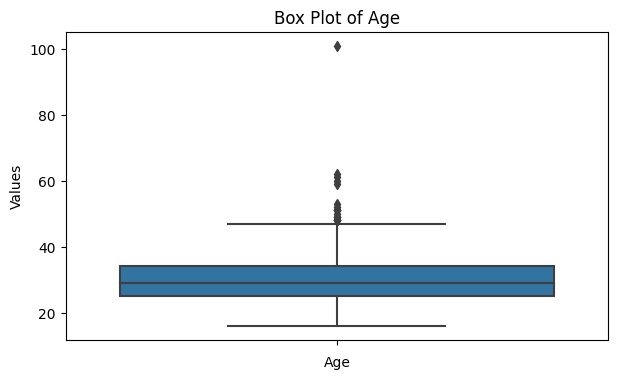

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

dataset_clean = df.dropna(subset=['Age'])

# Creating the box plot for Age
plt.figure(figsize=(7, 4))
sns.boxplot(y=dataset_clean['Age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.ylabel('Values')
plt.show()

<Axes: ylabel='AutismQuotient'>

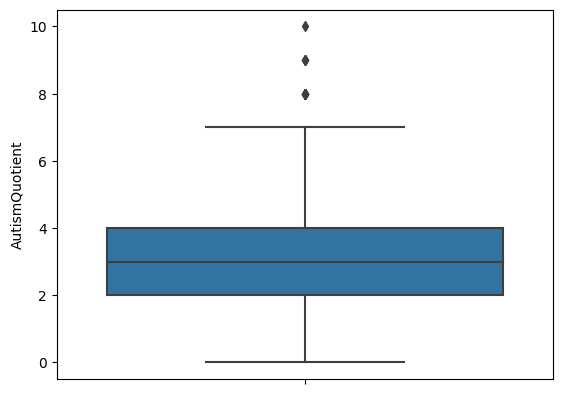

In [10]:
# Creating the box plot for AutismQuotient
dataset_clean = df.dropna(subset=['AutismQuotient'])
sns.boxplot(y=dataset_clean['AutismQuotient'])

<Axes: ylabel='STAI'>

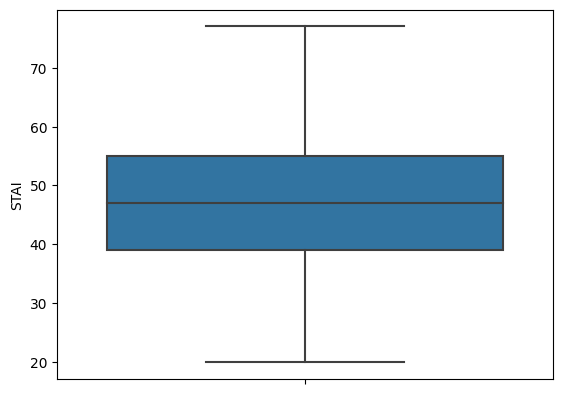

In [11]:
# Creating the box plot for STAI
dataset_clean = df.dropna(subset=['STAI'])
sns.boxplot(y=dataset_clean['STAI'])

<Axes: ylabel='BRIEF_Total'>

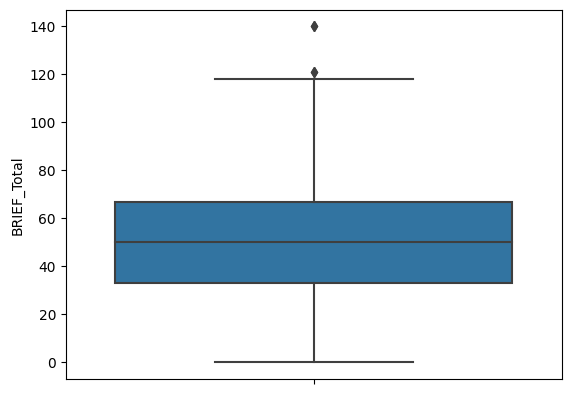

In [12]:
# Creating the box plot for BRIEF_Total
dataset_clean = df.dropna(subset=['BRIEF_Total'])
sns.boxplot(y=dataset_clean['BRIEF_Total'])

<Axes: ylabel='DailyAvgMins'>

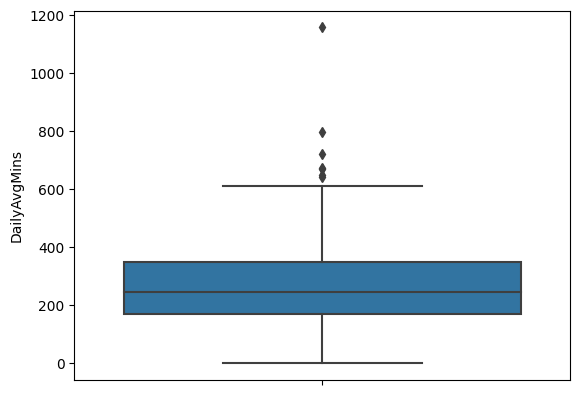

In [13]:
# Creating the box plot for DailyAvgMins
dataset_clean = df.dropna(subset=['DailyAvgMins'])
sns.boxplot(y=dataset_clean['DailyAvgMins'])

<Axes: ylabel='DailyAvePickups'>

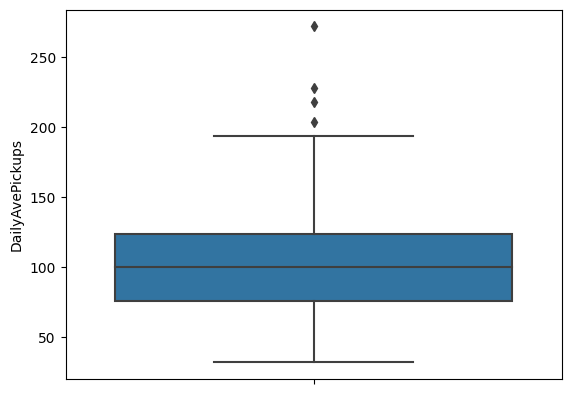

In [14]:
# Creating the box plot for DailyAvePickups
dataset_clean = df.dropna(subset=['DailyAvePickups'])
sns.boxplot(y=dataset_clean['DailyAvePickups'])


## **Interpretation**
From the plots above we could see that Age, AutismQuotient, BRIEF_Total, DailyAvgMins, and DailyAvePickups all have outliers, while STAI has no outlier. GenderNum and Devices are categorical variables.

The boxplot above has provided detailed information regarding how to handle the missing values espcially those with outliers. Before moving to impute or delete the missing values, let us understand the type of missing values in the dataset; MCAR, MAR or MNAR.   

## **Type of Missing Values in the Dataset: MCAR, MAR or MNAR**

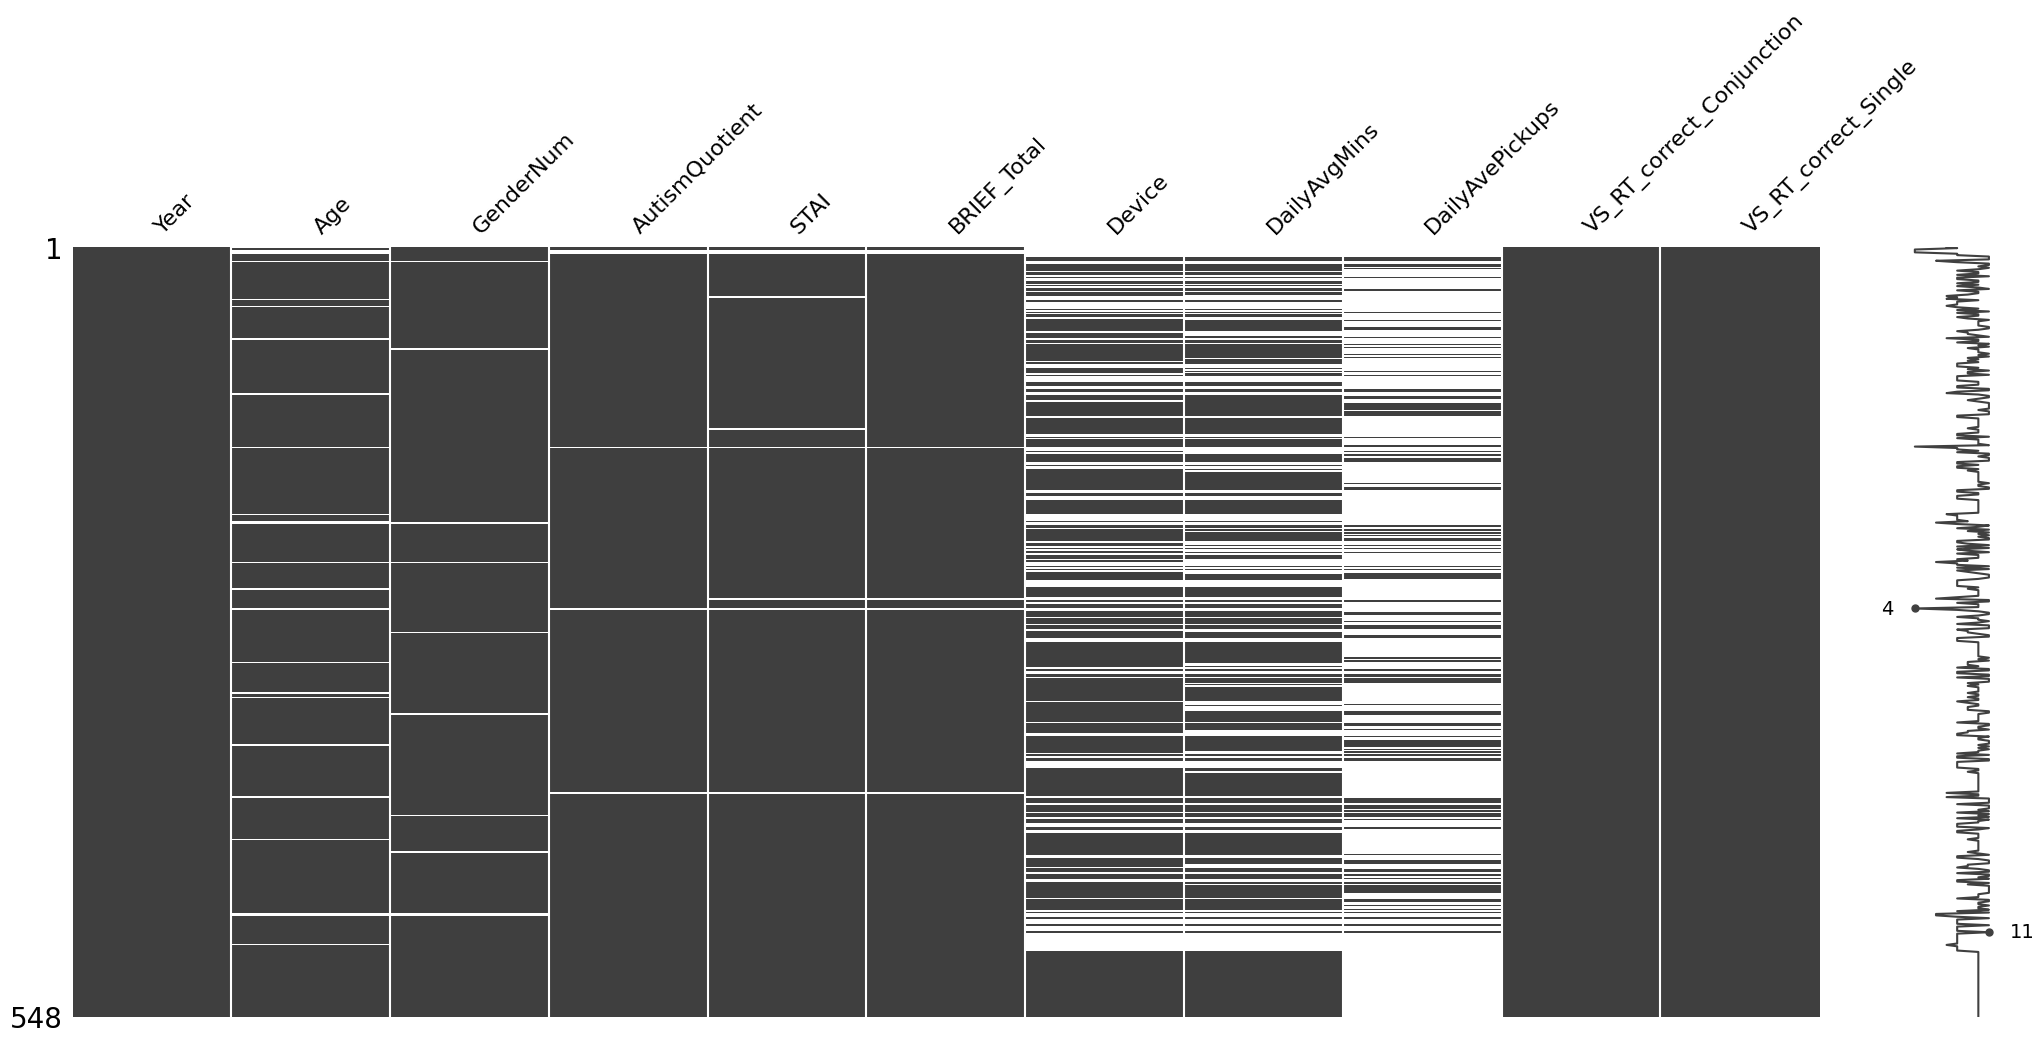

In [15]:
# Identify the type of missing values in the dataset

# pip install missingno
import missingno as msno

# Visualize the missingness
msno.matrix(dataset)
plt.show()


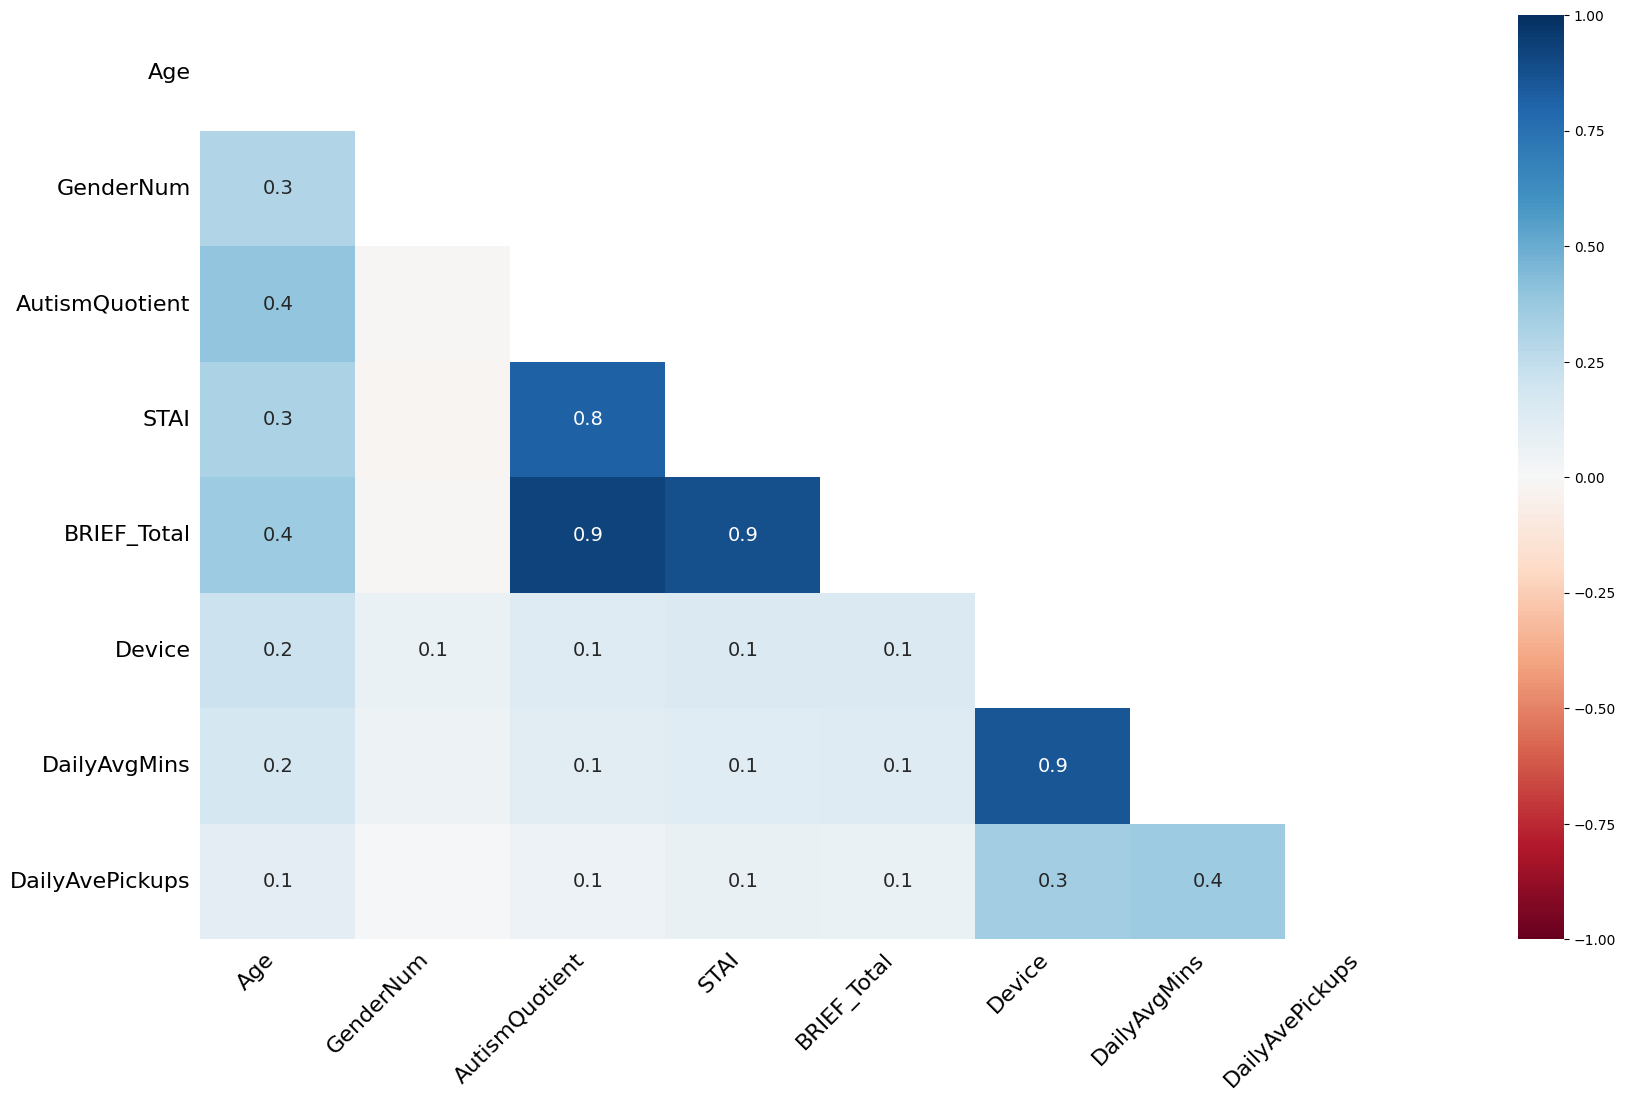

In [23]:
# Heatmap to see the correlation of missingness between variables
msno.heatmap(dataset)
plt.show()

## **Interpretation**
Based on the patterns observed in both plots, there is evidence that the data may be Missing At Random (MAR). The missing data in 'Age' and 'GenderNum' seems to be related, indicating that the missingness is not completely at random and may depend on other observed variables.

The high correlation between missing values in 'AutismQuotient' and 'BRIEF_Total' also supports the possibility of MAR, as the likelihood of missing data in one is strongly related to the missingness in the other.

Overall, the patterns in the plot confirms evidence of correlation between the values, and variables in the dataset. Thus we can infer that the data is Missing At Random.

## **Imputing the missing values**

In [16]:
# Imputing the most frequent value for gender
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df['GenderNum'] = imputer.fit_transform(df[['GenderNum']])

In [17]:
# Imputing the most frequent value for Device
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df['Device'] = imputer.fit_transform(df[['Device']])

In [26]:
df

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,Device,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single
0,2022,<NA>,2.0,4,49,70,iPhone,<NA>,<NA>,1178.700000,1216.387500
1,2021,37,2.0,8,44,33,iPhone,<NA>,<NA>,946.470000,785.597500
2,2022,<NA>,1.0,<NA>,<NA>,<NA>,iPhone,<NA>,<NA>,1182.741667,950.900000
3,2022,<NA>,1.0,<NA>,<NA>,<NA>,iPhone,<NA>,<NA>,1778.950000,984.333333
4,2022,<NA>,2.0,<NA>,<NA>,<NA>,iPhone,<NA>,<NA>,521.500000,503.000000
...,...,...,...,...,...,...,...,...,...,...,...
543,2020,38,1.0,3,56,39,iPhone,507,<NA>,915.785917,747.883194
544,2020,27,2.0,5,64,77,iPhone,267,<NA>,877.783333,720.729583
545,2020,36,2.0,2,46,43,iPhone,610,<NA>,1211.483333,1049.979167
546,2020,31,2.0,4,67,69,iPhone,558,<NA>,899.774583,845.612083


In [18]:
# STAI - we use mean since there are no outliers
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df['STAI'] = imputer.fit_transform(df[['STAI']])

# Use SimpleImputer to impute missing value for Age, AutismQuotient, BRIEF_Total, DailyAvgMins, & DailyAvgPickups
# Strategy = median because of presence of outlier
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df['AutismQuotient'] = imputer.fit_transform(df[['AutismQuotient']])

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df['BRIEF_Total'] = imputer.fit_transform(df[['BRIEF_Total']])

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df['DailyAvgMins'] = imputer.fit_transform(df[['DailyAvgMins']])

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df['DailyAvePickups'] = imputer.fit_transform(df[['DailyAvePickups']])

In [19]:
df.isnull().sum()

Year                         0
Age                          0
GenderNum                    0
AutismQuotient               0
STAI                         0
BRIEF_Total                  0
Device                       0
DailyAvgMins                 0
DailyAvePickups              0
VS_RT_correct_Conjunction    0
VS_RT_correct_Single         0
dtype: int64

In [20]:
df

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,Device,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single
0,2022,29.0,2.0,4.0,49.00000,70.0,iPhone,245.0,100.0,1178.700000,1216.387500
1,2021,37.0,2.0,8.0,44.00000,33.0,iPhone,245.0,100.0,946.470000,785.597500
2,2022,29.0,1.0,3.0,47.42115,50.0,iPhone,245.0,100.0,1182.741667,950.900000
3,2022,29.0,1.0,3.0,47.42115,50.0,iPhone,245.0,100.0,1778.950000,984.333333
4,2022,29.0,2.0,3.0,47.42115,50.0,iPhone,245.0,100.0,521.500000,503.000000
...,...,...,...,...,...,...,...,...,...,...,...
543,2020,38.0,1.0,3.0,56.00000,39.0,iPhone,507.0,100.0,915.785917,747.883194
544,2020,27.0,2.0,5.0,64.00000,77.0,iPhone,267.0,100.0,877.783333,720.729583
545,2020,36.0,2.0,2.0,46.00000,43.0,iPhone,610.0,100.0,1211.483333,1049.979167
546,2020,31.0,2.0,4.0,67.00000,69.0,iPhone,558.0,100.0,899.774583,845.612083


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       548 non-null    int64  
 1   Age                        548 non-null    float64
 2   GenderNum                  548 non-null    float64
 3   AutismQuotient             548 non-null    float64
 4   STAI                       548 non-null    float64
 5   BRIEF_Total                548 non-null    float64
 6   Device                     548 non-null    object 
 7   DailyAvgMins               548 non-null    float64
 8   DailyAvePickups            548 non-null    float64
 9   VS_RT_correct_Conjunction  548 non-null    float64
 10  VS_RT_correct_Single       548 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 47.2+ KB


In [22]:
newdf = df.convert_dtypes()
print("New_dtypes:")
print(newdf.dtypes)

New_dtypes:
Year                           Int64
Age                            Int64
GenderNum                      Int64
AutismQuotient                 Int64
STAI                         Float64
BRIEF_Total                    Int64
Device                        string
DailyAvgMins                   Int64
DailyAvePickups                Int64
VS_RT_correct_Conjunction    Float64
VS_RT_correct_Single         Float64
dtype: object


# **2. DATA RELATIONSHIP/DISTRIBUTION**

## a. Frequency distribution table with appropriate plot

In [23]:
# Create a frequency table
frequency_table = df.groupby('GenderNum')['DailyAvePickups'].sum()
print(frequency_table)

GenderNum
1.0    11808.0
2.0    42954.0
3.0      662.0
Name: DailyAvePickups, dtype: float64


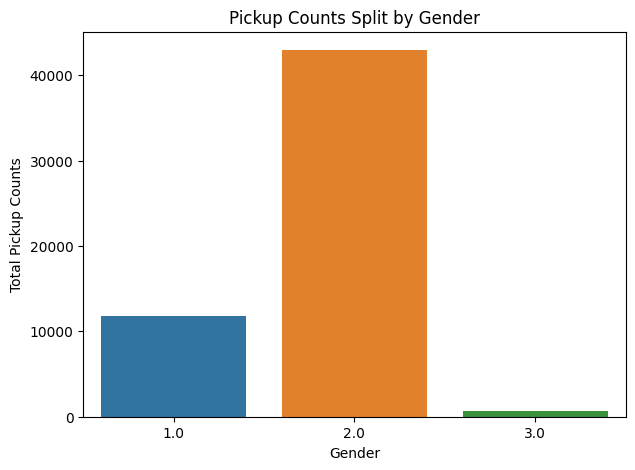

In [24]:
# Create a bar plot for visualization
plt.figure(figsize=(7, 5))
sns.barplot(x=frequency_table.index, y=frequency_table.values)
plt.title('Pickup Counts Split by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Pickup Counts')
plt.show()

## b. Frequency table distribution of DAilyAvgMins

In [25]:
# Create a frequency table
frequency_table = df['DailyAvgMins'].value_counts().sort_index()
print(frequency_table)

0.0       3
27.0      1
28.0      1
33.0      1
35.0      1
         ..
668.0     1
672.0     1
721.0     1
798.0     1
1157.0    1
Name: DailyAvgMins, Length: 244, dtype: int64


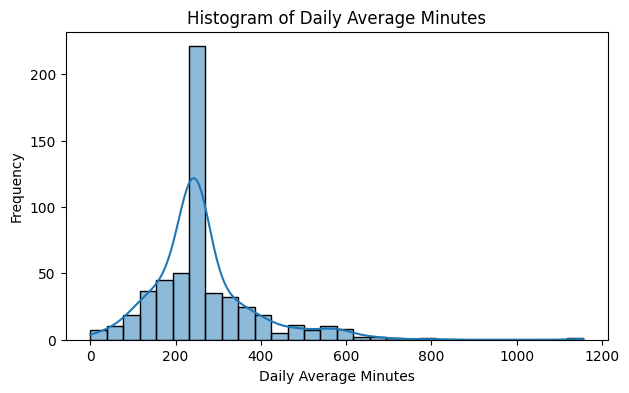

In [26]:
# Plot 1: Histogram
plt.figure(figsize=(7, 4))
sns.histplot(df['DailyAvgMins'], bins=30, kde=True)
plt.title('Histogram of Daily Average Minutes')
plt.xlabel('Daily Average Minutes')
plt.ylabel('Frequency')
plt.show()

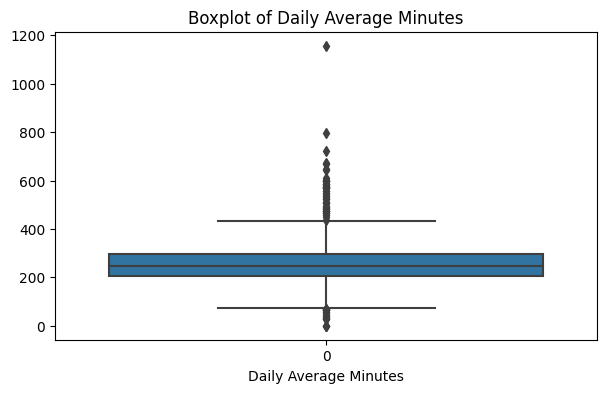

In [27]:
# Plot 2: Boxplot
plt.figure(figsize=(7, 4))
sns.boxplot(df['DailyAvgMins'])
plt.title('Boxplot of Daily Average Minutes')
plt.xlabel('Daily Average Minutes')
plt.show()

## **C. Plots to show participant's Age and response time on Singleton Visual Search**

## i. Participant's Age and VS_RT_Correct_Single

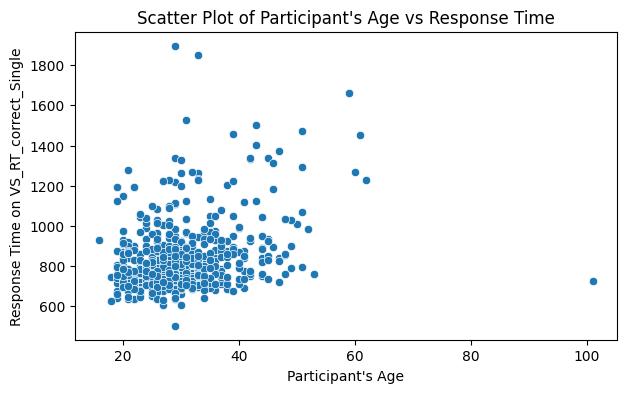

In [28]:
# Plot 1: Scatter Plot
plt.figure(figsize=(7, 4))
sns.scatterplot(x='Age', y='VS_RT_correct_Single', data=df)
plt.title("Scatter Plot of Participant's Age vs Response Time")
plt.xlabel("Participant's Age")
plt.ylabel('Response Time on VS_RT_correct_Single')
plt.show()

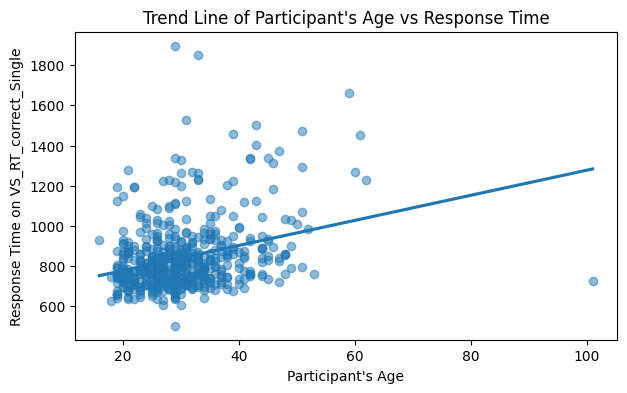

In [29]:
# Plot 2: Line Plot with Trend Line
plt.figure(figsize=(7, 4))
sns.regplot(x='Age', y='VS_RT_correct_Single', data=df, ci=None, scatter_kws={'alpha':0.5})
plt.title("Trend Line of Participant's Age vs Response Time")
plt.xlabel("Participant's Age")
plt.ylabel('Response Time on VS_RT_correct_Single')
plt.show()

## ii. Participant's gender and VS_RT_Conjuction

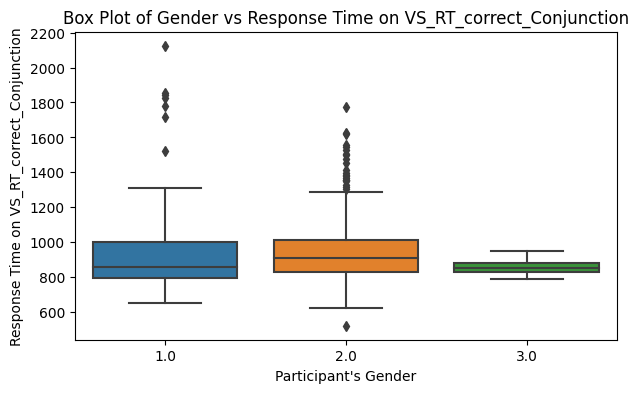

In [30]:
# Plot 1: Box Plot
plt.figure(figsize=(7, 4))
sns.boxplot(x='GenderNum', y='VS_RT_correct_Conjunction', data=df)
plt.title("Box Plot of Gender vs Response Time on VS_RT_correct_Conjunction")
plt.xlabel("Participant's Gender")
plt.ylabel('Response Time on VS_RT_correct_Conjunction')
plt.show()

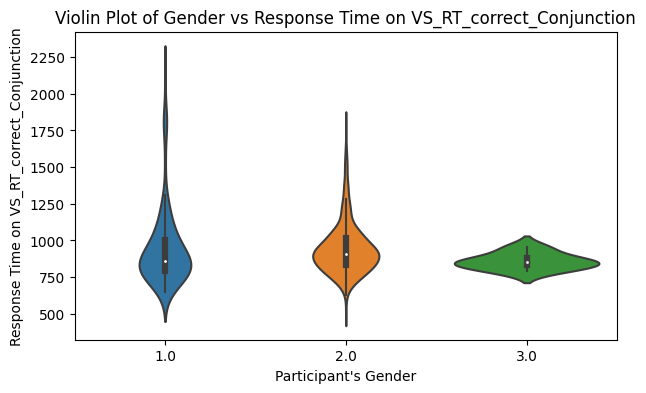

In [31]:
# Plot 2: Violin Plot
plt.figure(figsize=(7, 4))
sns.violinplot(x='GenderNum', y='VS_RT_correct_Conjunction', data=df)
plt.title("Violin Plot of Gender vs Response Time on VS_RT_correct_Conjunction")
plt.xlabel("Participant's Gender")
plt.ylabel('Response Time on VS_RT_correct_Conjunction')
plt.show()

## **3. Correlation Check**

In [32]:
# Calculate the correlation for the specified variables
correlation = df[['Age', 'STAI', 'BRIEF_Total', 'DailyAvgMins', 'VS_RT_correct_Single']].corr()
print(correlation)

                           Age      STAI  BRIEF_Total  DailyAvgMins  \
Age                   1.000000 -0.114051    -0.071493     -0.112639   
STAI                 -0.114051  1.000000     0.629499      0.013783   
BRIEF_Total          -0.071493  0.629499     1.000000      0.070276   
DailyAvgMins         -0.112639  0.013783     0.070276      1.000000   
VS_RT_correct_Single  0.301813 -0.092774     0.001465     -0.041518   

                      VS_RT_correct_Single  
Age                               0.301813  
STAI                             -0.092774  
BRIEF_Total                       0.001465  
DailyAvgMins                     -0.041518  
VS_RT_correct_Single              1.000000  


## Interpretation

Age and VS_RT_correct_Single: There is a positive correlation of 0.301813, suggesting that as age increases, the response time on VS_RT_correct_Single tends to increase slightly.

STAI and BRIEF_Total: There is a significant positive correlation of 0.629499, indicating that higher STAI scores (often associated with anxiety or stress) are associated with higher BRIEF_Total scores (possibly indicating executive dysfunction).

Age with STAI and BRIEF_Total: Both show a small negative correlation with Age, suggesting no strong relationship between age and these scores.

DailyAvgMins: Shows very little to no correlation with the other variables, suggesting that the daily average minutes spent on a mobile phone do not significantly affect the other measured aspects.

## **4. Linear Regression**

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


<Axes: xlabel='DailyAvgMins', ylabel='VS_RT_correct_Single'>

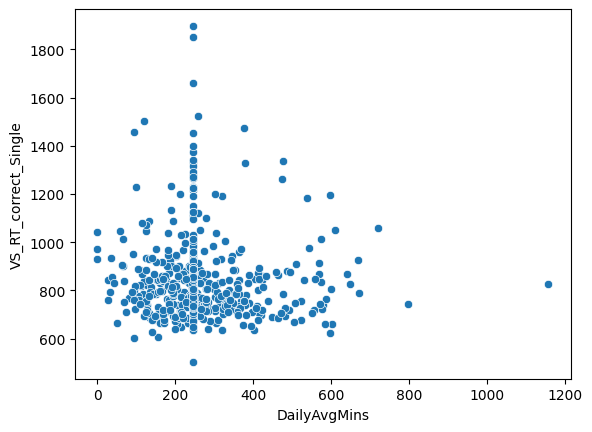

In [34]:
sns.scatterplot(x='DailyAvgMins', y='VS_RT_correct_Single', data=df)

In [35]:
df.head()

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,Device,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single
0,2022,29.0,2.0,4.0,49.00000,70.0,iPhone,245.0,100.0,1178.700000,1216.387500
1,2021,37.0,2.0,8.0,44.00000,33.0,iPhone,245.0,100.0,946.470000,785.597500
2,2022,29.0,1.0,3.0,47.42115,50.0,iPhone,245.0,100.0,1182.741667,950.900000
3,2022,29.0,1.0,3.0,47.42115,50.0,iPhone,245.0,100.0,1778.950000,984.333333
4,2022,29.0,2.0,3.0,47.42115,50.0,iPhone,245.0,100.0,521.500000,503.000000


In [36]:
X = df[['DailyAvgMins']]
y = df['VS_RT_correct_Single']

In [37]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
# Create a Linear Regression model
model = LinearRegression()

In [39]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [40]:
# Predict on the testing data
y_pred = model.predict(X_test)
y_pred

array([846.98616073, 847.04713166, 841.74266092, 859.42423005,
       850.52247456, 835.70653904, 860.46073583, 845.15703289,
       848.69334672, 850.21761992, 852.04674776, 848.69334672,
       848.449463  , 841.19392257, 839.97450401, 846.25450959,
       857.83898592, 856.55859643, 848.99820136, 848.69334672,
       840.34032957, 851.80286405, 844.73023639, 833.63352749,
       848.63237579, 848.69334672, 848.69334672, 848.69334672,
       852.04674776, 848.69334672, 843.08402134, 832.71896357,
       848.69334672, 845.27897475, 848.69334672, 863.63122409,
       848.69334672, 842.04751556, 819.67118497, 851.25412569,
       848.69334672, 848.69334672, 853.20519539, 852.59548611,
       849.12014321, 837.29178317, 848.69334672, 850.64441641,
       848.69334672, 848.69334672, 843.14499226, 854.60752674,
       855.94888715, 828.69488232, 843.02305041, 850.03470713,
       845.21800382, 850.64441641, 854.18073024, 839.91353308,
       847.71781187, 852.96131168, 852.90034075, 838.26

In [41]:
model.score(X_test, y_test)

-0.017355342402494145

In [42]:
model.score(X_train, y_train)

0.0017324520742169058

## **5. Multiple Regression**

In [43]:
# Prepare the features and target variables for multiple regression
X = df.drop(['Year', 'Device', 'VS_RT_correct_Single', 'AutismQuotient'], axis=1)  # Independent variables
y = df['VS_RT_correct_Single']

In [46]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
# Create a Linear Regression model
model = LinearRegression()

In [48]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [49]:
model.score(X_test, y_test)

0.7923182778198339

In [50]:
model.score(X_train, y_train)

0.8267114794840222

In [51]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([ 882.22121871,  873.02340678,  838.33067113,  878.79932152,
        744.56335123,  883.9541777 ,  636.56396253,  815.43960161,
        925.76163689,  752.40296237,  860.74643529,  767.63495431,
        736.79808028,  795.12228268,  802.91938177,  668.41478572,
        779.83910641, 1056.98066419,  804.4177395 ,  896.51526815,
        761.05844497,  850.00528289,  791.78137871,  835.32577778,
        719.16495733,  730.65609484, 1027.68636644,  728.58180244,
        784.20975058,  727.04114235,  761.32505675,  820.67307909,
        656.95394724,  873.75508079,  893.97112085,  904.38319615,
        892.20407787,  758.6032545 ,  947.18916831,  990.99946082,
        787.04981423,  677.02276397,  688.09142925, 1025.18014309,
        834.95306036,  915.86215508, 1220.53495749,  804.02917286,
        722.3899135 , 1062.74911364,  737.62736801,  717.39429879,
        954.91830746, 1035.10384103,  755.91778809,  735.66532609,
        815.54975673, 1076.29889336,  603.93085134,  874.85190

In [52]:
# Calculate the R-squared value for the model on the test set
r_squared = r2_score(y_test, y_pred)
r_squared

0.7923182778198339

In [53]:
# Check the coefficients of the predictors
coef = pd.DataFrame(model.coef_, index=X.columns, columns=['Coef'])
coef

,Coef
Age,0.121730
GenderNum,5.597117
STAI,-0.339848
BRIEF_Total,0.111304
DailyAvgMins,0.029677
DailyAvePickups,-0.483411
VS_RT_correct_Conjunction,0.793182


In [54]:
# Check if DailyAvgMins is a significant predictor
daily_avg_mins_coef = coef.loc['DailyAvgMins', 'Coef']

In [55]:
r_squared, daily_avg_mins_coef

(0.7923182778198339, 0.029677113638915398)

## **6. Scenario 1**

In [56]:
# Define Age Groups
# Group A: ≤30 years, Group B: 31 to 49 years, Group C: ≥50 years
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[0, 30, 49, float('inf')],
                        labels=['A', 'B', 'C'],
                        right=False)

In [57]:
print(df.head())

   Year   Age  GenderNum  AutismQuotient      STAI  BRIEF_Total  Device  \
0  2022  29.0        2.0             4.0  49.00000         70.0  iPhone   
1  2021  37.0        2.0             8.0  44.00000         33.0  iPhone   
2  2022  29.0        1.0             3.0  47.42115         50.0  iPhone   
3  2022  29.0        1.0             3.0  47.42115         50.0  iPhone   
4  2022  29.0        2.0             3.0  47.42115         50.0  iPhone   

   DailyAvgMins  DailyAvePickups  VS_RT_correct_Conjunction  \
0         245.0            100.0                1178.700000   
1         245.0            100.0                 946.470000   
2         245.0            100.0                1182.741667   
3         245.0            100.0                1778.950000   
4         245.0            100.0                 521.500000   

   VS_RT_correct_Single AgeGroup  
0           1216.387500        A  
1            785.597500        B  
2            950.900000        A  
3            984.333333       

In [64]:
# Define Usage Groups
# Group A: ≤300 minutes, Group B: 301 to 899 minutes, Group C: ≥900 minutes
df['UsageGroup'] = pd.cut(df['DailyAvgMins'],
                          bins=[0, 300, 899, float('inf')],
                          labels=['A', 'B', 'C'],
                          right=False)

In [65]:
print(df.head())

   Year   Age  GenderNum  AutismQuotient      STAI  BRIEF_Total  Device  \
0  2022  29.0        2.0             4.0  49.00000         70.0  iPhone   
1  2021  37.0        2.0             8.0  44.00000         33.0  iPhone   
2  2022  29.0        1.0             3.0  47.42115         50.0  iPhone   
3  2022  29.0        1.0             3.0  47.42115         50.0  iPhone   
4  2022  29.0        2.0             3.0  47.42115         50.0  iPhone   

   DailyAvgMins  DailyAvePickups  VS_RT_correct_Conjunction  \
0         245.0            100.0                1178.700000   
1         245.0            100.0                 946.470000   
2         245.0            100.0                1182.741667   
3         245.0            100.0                1778.950000   
4         245.0            100.0                 521.500000   

   VS_RT_correct_Single AgeGroup UsageGroup  
0           1216.387500        A          A  
1            785.597500        B          A  
2            950.900000        A

# Hypothesis
Hypothesis: Increased mobile phone use reduces the time to find the target in singleton search, with the greatest decrease in participants under 30.

## Test Choice
A Two-Way ANOVA seems appropriate as it can examine the effects of two independent variables (Age Group and Usage Group) on a continuous dependent variable (time taken to find the search target).

## Justification
Two-Way ANOVA allows us to see the interaction between the two independent variables on the dependent variable. It can also show if the effect of one independent variable is consistent across the levels of the other independent variable.

## Assumptions and Corresponding Test Statistics

**Normality:** The dependent variable should be normally distributed within groups. Test with Shapiro-Wilk test.

**Homogeneity of Variances:** Variances should be equal across groups. Test with Levene's Test.

**Independence:** Observations should be independent of each other.

**Linearity:** The relationship between independent variables and the dependent variable should be linear.

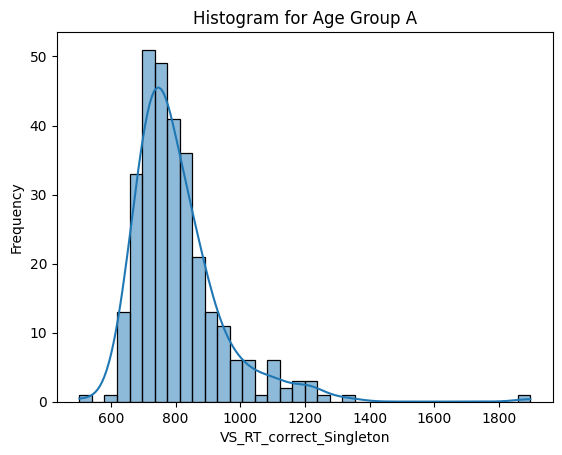

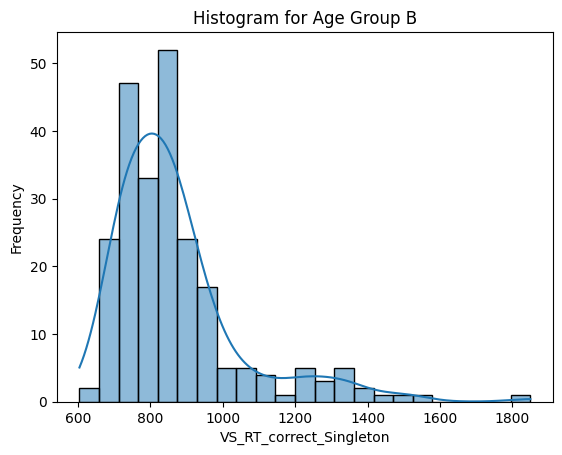

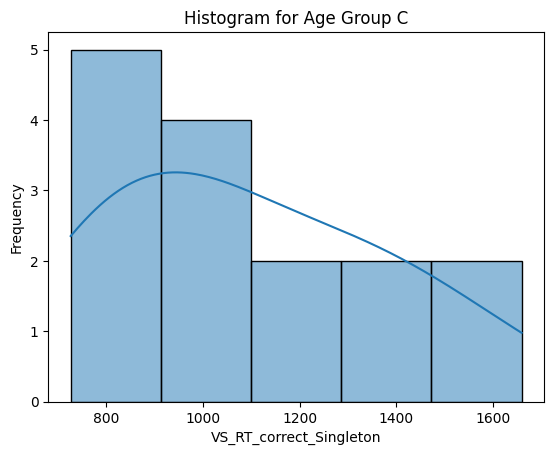

In [62]:
# Histogram for each Age Group
for group in df['AgeGroup'].unique():
    sns.histplot(df[df['AgeGroup'] == group]['VS_RT_correct_Single'], kde=True)
    plt.title(f'Histogram for Age Group {group}')
    plt.xlabel('VS_RT_correct_Singleton')
    plt.ylabel('Frequency')
    plt.show()

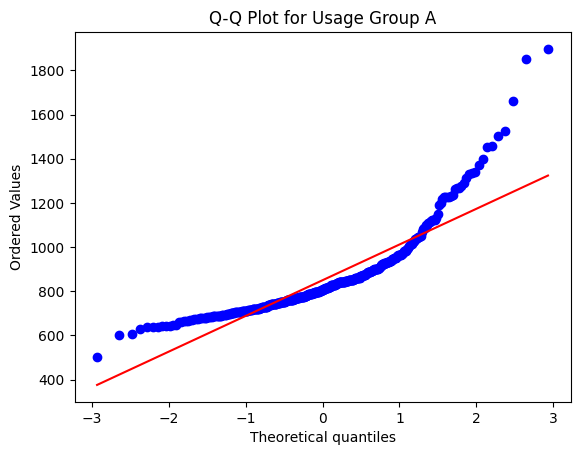

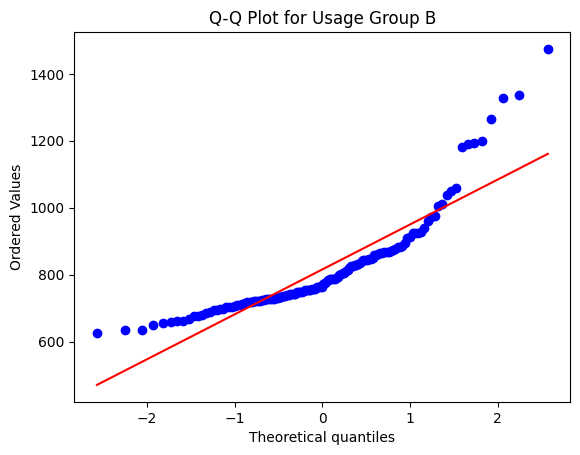

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


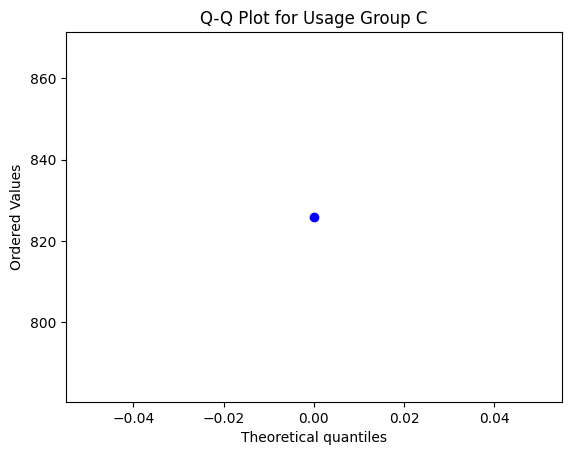

In [67]:
from scipy import stats

# Q-Q plot for each Usage Group
for group in df['UsageGroup'].unique():
    stats.probplot(df[df['UsageGroup'] == group]['VS_RT_correct_Single'], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for Usage Group {group}')
    plt.show()

In [66]:
def variance_ratio_check(data, group_col, value_col):
    # Calculating the variance for each group
    group_variances = data.groupby(group_col)[value_col].var()

    # Identifying the largest and smallest variances
    max_variance = group_variances.max()
    min_variance = group_variances.min()

    # Computing the ratio of the largest to smallest variance
    ratio = max_variance / min_variance

    # Printing out the variances and the ratio
    print("Variances per group:\n", group_variances)
    print(f"Variance Ratio (Max/Min): {ratio:.3f}")

    # Providing a basic interpretation based on the 4:1 rule
    if ratio <= 4:
        print("The ratio is less than or equal to 4:1; the homogeneity of variances assumption is likely met.")
    else:
        print("The ratio is greater than 4:1; the homogeneity of variances assumption may be violated.")

# Function for AgeGroup and UsageGroup
variance_ratio_check(df, 'AgeGroup', 'VS_RT_correct_Single')
variance_ratio_check(df, 'UsageGroup', 'VS_RT_correct_Single')


Variances per group:
 AgeGroup
A    20127.322045
B    32209.041536
C    83587.323592
Name: VS_RT_correct_Single, dtype: float64
Variance Ratio (Max/Min): 4.153
The ratio is greater than 4:1; the homogeneity of variances assumption may be violated.
Variances per group:
 UsageGroup
A    32032.177726
B    21743.259497
C             NaN
Name: VS_RT_correct_Single, dtype: float64
Variance Ratio (Max/Min): 1.473
The ratio is less than or equal to 4:1; the homogeneity of variances assumption is likely met.


## **INFERENCE**

The assumption of homogeneity of variances seems to be satisfied based on the variance ratio test, but the normality assumption was violated in Age and Usage Groups A, B, and C, as indicated by the histograms and Q-Q plots. This suggests that while ANOVA could still be performed, the results should be interpreted with caution, and possibly confirmed with a non-parametric test, which does not assume normality, but before that, let us apply Log transformation and find out if the transformed data will follow normal distribution.  

In [68]:
# Apply a log transformation to the VS_RT_correct_Single column
df['Log_Transformed'] = np.log(df['VS_RT_correct_Single'][df['VS_RT_correct_Single'] > 0])

In [69]:
# Check the transformation results
print(df[['VS_RT_correct_Single', 'Log_Transformed']].head())

   VS_RT_correct_Single  Log_Transformed
0           1216.387500         7.103641
1            785.597500         6.666445
2            950.900000         6.857409
3            984.333333         6.891965
4            503.000000         6.220590


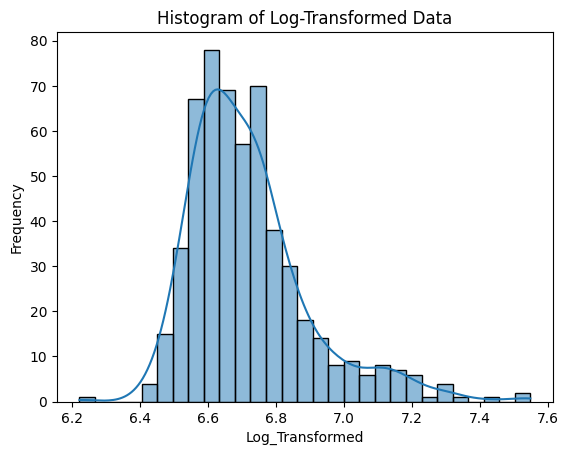

In [70]:
# Plot a histogram of the log-transformed data
sns.histplot(df['Log_Transformed'], kde=True)
plt.title('Histogram of Log-Transformed Data')
plt.xlabel('Log_Transformed')
plt.ylabel('Frequency')
plt.show()

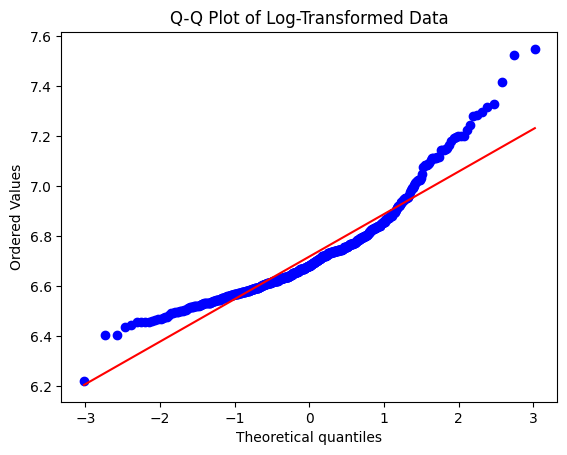

In [71]:
# Generate a Q-Q plot of the log-transformed data
stats.probplot(df['Log_Transformed'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Log-Transformed Data')
plt.show()

In [77]:
from scipy.stats import shapiro

# Shapiro-Wilk test for normality
transformed_data_column = df['Log_Transformed']
stat, p_value = shapiro(transformed_data_column)

In [81]:

# Print the results
print(f"Shapiro-Wilk Test for Normality:")
print(f"Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value > 0.05:
    print("The transformed data follows a normal distribution (p > 0.05).")
else:
    print("The transformed data does not follow a normal distribution, consider Non-Parametric Test (p <= 0.05).")


Shapiro-Wilk Test for Normality:
Statistic: 0.9058024287223816
P-value: 6.643635920159488e-18
The transformed data does not follow a normal distribution, consider Non-Parametric Test (p <= 0.05).


In [72]:
from scipy.stats import kruskal

# Conduct the Kruskal-Wallis test for 'AgeGroup'
age_group_data = [group['VS_RT_correct_Single'].values for name, group in df.groupby('AgeGroup')]
stat, p = kruskal(*age_group_data)
print('Kruskal-Wallis test for Age Groups:')
print('Statistics=%.3f, p=%.3f' % (stat, p))

Kruskal-Wallis test for Age Groups:
Statistics=38.955, p=0.000


In [73]:
# Conduct the Kruskal-Wallis test for 'UsageGroup'
usage_group_data = [group['VS_RT_correct_Single'].values for name, group in df.groupby('UsageGroup')]
stat, p = kruskal(*usage_group_data)
print('\nKruskal-Wallis test for Usage Groups:')
print('Statistics=%.3f, p=%.3f' % (stat, p))


Kruskal-Wallis test for Usage Groups:
Statistics=5.308, p=0.070


## **INTERPRETATION**
## AgeGroup
The results from the Kruskal-Wallis test for Age Groups (Statistics=38.955, p=0.000) are statistically significant, which means there is evidence that supports the hypothesis that increased mobile phone use leads to a decrease in the time it takes to find the search target in Singleton search. But further analysis is needed to confirm if the youngest group (less than 30 years old) experiences the greatest decrease in reaction time. We will need to conduct post-hoc pairwise comparisons for the Age Groups to specifically examine if the group under 30 years old has a significantly faster reaction time.

## UsageGroup
For Usage Groups (statistics = 5.308, p = 0.070), the result does not support the hypothesis that increased mobile phone use correlates with reaction times in the singleton search task. There is no evidence from this test to suggest that daily average minutes of mobile usage have a significant impact on the participants' ability to find the search target.


In [76]:
# pip install scikit-posthocs
import scikit_posthocs as sp


# For Age Groups
age_group_posthoc = sp.posthoc_dunn(df, val_col='VS_RT_correct_Single', group_col='AgeGroup', p_adjust='bonferroni')
print("Post-hoc for Age Groups with Bonferroni correction:")
print(age_group_posthoc)

Post-hoc for Age Groups with Bonferroni correction:
          A         B         C
A  1.000000  0.000003  0.000019
B  0.000003  1.000000  0.012381
C  0.000019  0.012381  1.000000


## **INFERENCE**
Following the significance of the Kruskal-Wallis test for Agegroups, A Dunn post-hoc test was introduced to compare and find out if if the youngest Age group (less than 30 years old) experiences the greatest decrease in reaction time. To do this, a p-value correction for multiple comparisons, such as the Bonferroni correction was applied to control the family-wise error rate.

## RESULT
Comparison between Group A (≤30 years) and Group B (31 to 49 years):
p-value: 0.000003

Comparison between Group A (≤30 years) and Group C (≥50 years):
p-value: 0.000019

Comparison between Group B (31 to 49 years) and Group C (≥50 years):
p-value: 0.012381

The post-hoc test confirms that there are significant differences in reaction times between all pairs of age groups. The evidence supports the initial hypothesis that as participant mobile phone use increased, the time taken to find the search target decreased, with the greatest decrease observed in participants aged 30 or below.

## **7. Scenario 2**

In [96]:
# Step 1: Sort the Existing Dataset
# Sort the dataset by 'VS_RT_correct_Single' in descending order
df_sorted = df.sort_values(by='VS_RT_correct_Single', ascending=False)

In [97]:
# Rename columns as instructed
df_sorted.rename(columns={'VS_RT_correct_Conjunction': 'VS_RT_Before', 'VS_RT_correct_Single': 'VS_RT_After'}, inplace=True)

In [98]:
newdf = df_sorted
newdf

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,Device,DailyAvgMins,DailyAvePickups,VS_RT_Before,VS_RT_After,AgeGroup,UsageGroup,Log_Transformed
190,2021,29.0,1.0,2.0,24.00000,12.0,iPhone,245.0,100.0,1840.291667,1896.975000,A,A,7.548016
488,2020,33.0,1.0,3.0,42.00000,49.0,iPhone,245.0,100.0,2125.150000,1849.425000,B,A,7.522630
494,2020,59.0,1.0,4.0,51.00000,65.0,iPhone,245.0,100.0,1851.734083,1659.979306,C,A,7.414560
7,2021,31.0,2.0,1.0,43.00000,44.0,iPhone,259.0,54.0,1015.666667,1524.733333,B,A,7.329575
171,2021,43.0,2.0,0.0,52.00000,43.0,iPhone,119.0,57.0,1625.691667,1504.225000,B,A,7.316033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,2020,27.0,2.0,4.0,30.00000,34.0,Android,141.0,100.0,720.875417,628.811944,A,A,6.443832
423,2020,18.0,2.0,3.0,47.00000,63.0,iPhone,598.0,100.0,660.135833,625.043750,A,B,6.437822
9,2021,27.0,1.0,3.0,32.00000,4.0,iPhone,155.0,97.0,650.187500,604.390000,A,A,6.404220
242,2020,30.0,2.0,3.0,54.00000,27.0,iPhone,94.0,100.0,625.630917,604.172889,B,A,6.403860


In [161]:
# Step 2: Create Brain Training Variable
# Create a new variable 'Brain Training' and randomly allocate participants
# Set a seed for reproducibility
np.random.seed(42)

# Create 'Brain Training' variable with random allocation
newdf['Brain_Training'] = np.random.choice(['Trained', 'Non-Trained'], size=len(newdf))
newdf

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,Device,DailyAvgMins,DailyAvePickups,VS_RT_Before,VS_RT_After,AgeGroup,UsageGroup,Log_Transformed,Brain Training,SubjectID,Brain_Training
190,2021,29.0,1.0,2.0,24.00000,12.0,iPhone,245.0,100.0,1840.291667,1896.975000,A,A,7.548016,Trained,1,Trained
488,2020,33.0,1.0,3.0,42.00000,49.0,iPhone,245.0,100.0,2125.150000,1849.425000,B,A,7.522630,Non-Trained,2,Non-Trained
494,2020,59.0,1.0,4.0,51.00000,65.0,iPhone,245.0,100.0,1851.734083,1659.979306,C,A,7.414560,Trained,3,Trained
7,2021,31.0,2.0,1.0,43.00000,44.0,iPhone,259.0,54.0,1015.666667,1524.733333,B,A,7.329575,Trained,4,Trained
171,2021,43.0,2.0,0.0,52.00000,43.0,iPhone,119.0,57.0,1625.691667,1504.225000,B,A,7.316033,Trained,5,Trained
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,2020,27.0,2.0,4.0,30.00000,34.0,Android,141.0,100.0,720.875417,628.811944,A,A,6.443832,Non-Trained,544,Non-Trained
423,2020,18.0,2.0,3.0,47.00000,63.0,iPhone,598.0,100.0,660.135833,625.043750,A,B,6.437822,Trained,545,Trained
9,2021,27.0,1.0,3.0,32.00000,4.0,iPhone,155.0,97.0,650.187500,604.390000,A,A,6.404220,Non-Trained,546,Non-Trained
242,2020,30.0,2.0,3.0,54.00000,27.0,iPhone,94.0,100.0,625.630917,604.172889,B,A,6.403860,Trained,547,Trained


## **Test Statistics**
A 2x2 mixed model ANOVA

##Justification:
**Two Independent Variables:** Gender and Brain Training.

**Repeated Measure:** Time (Before and After).

**Interaction Effect:** Assess how the combination of Gender and Brain

Training influences the time taken to find the search target.

##**Assumptions and Corresponding Tests**
**Assumption 1:** Normality

**Test:** Shapiro-Wilk test for normality.

**Assumption 2:** Homogeneity of Variances**

Test:** Levene's test for homogeneity of variances.

**Assumption 3:** Linearity (Scatter Plot)

Text(0.5, 1.0, 'Histogram for VS_RT_Before & VS_RT_After')

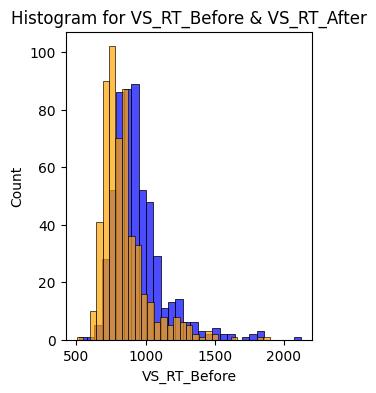

In [162]:
# Step 4: Check validity of those assumptions and provide appropriate visual charts.
# Histograms
plt.figure(figsize=(7, 4))
plt.subplot(1, 2, 1)
sns.histplot(newdf['VS_RT_Before'], bins=30, color='blue', alpha=0.7, label='VS_RT_Before')
sns.histplot(newdf['VS_RT_After'], bins=30, color='orange', alpha=0.7, label='VS_RT_After')
plt.title('Histogram for VS_RT_Before & VS_RT_After')


Text(0.5, 1.0, 'Q-Q Plot for VS_RT_After')

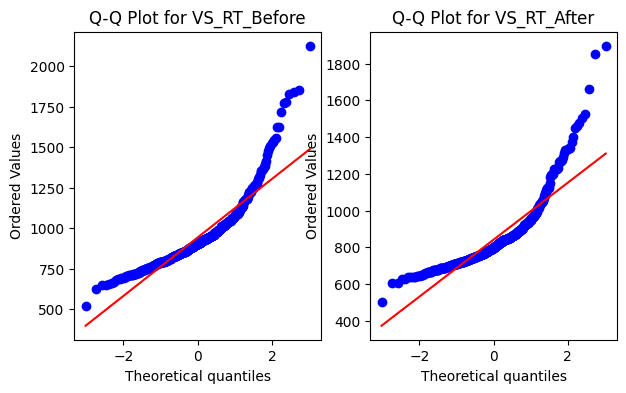

In [163]:
# Q-Q Plots
plt.figure(figsize=(7, 4))
plt.subplot(1, 2, 1)
stats.probplot(newdf['VS_RT_Before'], plot=plt)
plt.title('Q-Q Plot for VS_RT_Before')

plt.subplot(1, 2, 2)
stats.probplot(newdf['VS_RT_After'], plot=plt)
plt.title('Q-Q Plot for VS_RT_After')

In [164]:
# Shapiro-Wilk test for 'VS_RT_After'
stat_after, p_after = shapiro(newdf['VS_RT_After'])
print(f'Shapiro-Wilk Test for VS_RT_After - Statistic: {stat_after}, p-value: {p_after}')

# Interpret the results
if p_value > 0.05:
    print("The data follows a normal distribution (p > 0.05).")
else:
    print("The data does not follow a normal distribution (p <= 0.05).")

Shapiro-Wilk Test for VS_RT_After - Statistic: 0.80951988697052, p-value: 6.50798118070917e-25
The data does not follow a normal distribution (p <= 0.05).


In [165]:
from scipy.stats import levene

# Assumption 2: Homogeneity of Variances
# Levene's test
stat_levene, p_levene = levene(newdf['VS_RT_Before'], newdf['VS_RT_After'])
print(f"Levene's Test for Homogeneity of Variances - Statistic: {stat_levene}, p-value: {p_levene}")


Levene's Test for Homogeneity of Variances - Statistic: 4.357196556501194, p-value: 0.03708386099221487


<Axes: xlabel='VS_RT_Before', ylabel='VS_RT_After'>

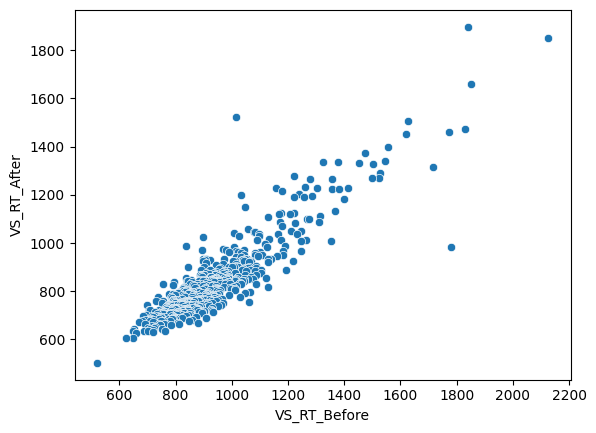

In [166]:
# Assumption of Independence
sns.scatterplot(x=newdf['VS_RT_Before'], y=newdf['VS_RT_After'])

In [167]:
# Create a 'SubjectID' column using the DataFrame index
newdf['SubjectID'] = range(1, len(newdf) + 1)

# Melt the DataFrame to long format
# Melt the DataFrame to long format with subjectID
melted_df = pd.melt(newdf, id_vars=['SubjectID', 'GenderNum', 'Brain_Training', 'UsageGroup'],
                    value_vars=['VS_RT_Before', 'VS_RT_After'], var_name='Time', value_name='VS_RT')
melted_df

,SubjectID,GenderNum,Brain_Training,UsageGroup,Time,VS_RT
0,1,1.0,Trained,A,VS_RT_Before,1840.291667
1,2,1.0,Non-Trained,A,VS_RT_Before,2125.150000
2,3,1.0,Trained,A,VS_RT_Before,1851.734083
3,4,2.0,Trained,A,VS_RT_Before,1015.666667
4,5,2.0,Trained,A,VS_RT_Before,1625.691667
...,...,...,...,...,...,...
1091,544,2.0,Non-Trained,A,VS_RT_After,628.811944
1092,545,2.0,Trained,B,VS_RT_After,625.043750
1093,546,1.0,Non-Trained,A,VS_RT_After,604.390000
1094,547,2.0,Trained,A,VS_RT_After,604.172889


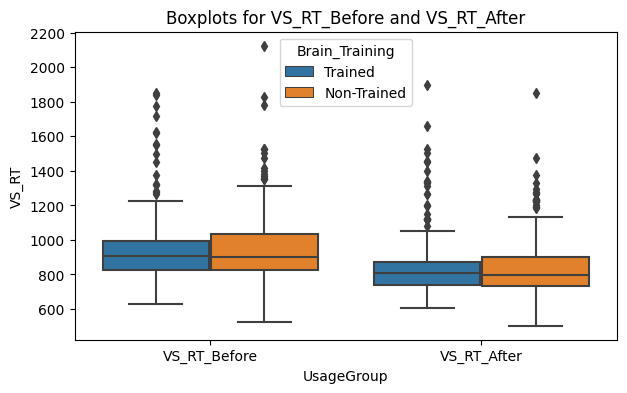

In [168]:
# Boxplots for 'VS_RT_Before' and 'VS_RT_After'.
plt.figure(figsize=(7, 4))
sns.boxplot(x='Time', y='VS_RT', hue='Brain_Training', data=melted_df)
plt.title('Boxplots for VS_RT_Before and VS_RT_After')
plt.xlabel('UsageGroup')
plt.show()


## **INTERPRETATION**
## Histograms and Q-Q Plots:

Both VS_RT_Before and VS_RT_After show a distribution that deviates from normality. This is evident in the histograms, which do not have the classic bell shape, and the Q-Q plots where the points significantly deviate from the line, especially in the tails.

Shapiro-Wilk Test:
The Shapiro-Wilk test results for both VS_RT_Before and VS_RT_After confirm the visual indication of non-normality with very low p-values, indicating that the reaction time data does not follow a normal distribution.

Levene's Test:
The Levene's test indicates that there are statistically significant differences in variances across groups (p-value < 0.05). This suggests that the assumption of homogeneity of variances is violated.

The Aligned Rank Transform (ART) can be used for non-parametric factorial analyses and is appropriate for designs that include within-subjects, between-subjects, or mixed factors.

In [169]:
# The Aligned Rank Transform (ART)
# Align the data
grouped = melted_df.groupby(['Time', 'Brain_Training', 'UsageGroup'])
melted_df['Aligned'] = melted_df.groupby(['Time', 'Brain_Training', 'UsageGroup'], group_keys=False)['VS_RT'].apply(lambda x: x - x.median())

In [176]:
from scipy.stats import rankdata
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Rank the aligned data
melted_df['Ranks'] = rankdata(melted_df['Aligned'])

# Perform ANOVA on the ranks
model = ols('Ranks ~ C(Time) * C(Brain_Training) * C(UsageGroup) * C(GenderNum)', data=melted_df).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

# Output the ANOVA table
print(anova_results)

                                                          sum_sq      df  \
C(Time)                                                      NaN     1.0   
C(Brain_Training)                                            NaN     1.0   
C(UsageGroup)                                      -9.780856e-08     2.0   
C(GenderNum)                                        2.142499e+06     2.0   
C(Time):C(Brain_Training)                                    NaN     1.0   
C(Time):C(UsageGroup)                              -4.958688e-07     2.0   
C(Brain_Training):C(UsageGroup)                     1.015214e+05     2.0   
C(Time):C(GenderNum)                                2.752934e+03     2.0   
C(Brain_Training):C(GenderNum)                      2.874228e+05     2.0   
C(UsageGroup):C(GenderNum)                          2.467129e+05     4.0   
C(Time):C(Brain_Training):C(UsageGroup)             2.972322e+04     2.0   
C(Time):C(Brain_Training):C(GenderNum)              4.281348e+04     2.0   
C(Time):C(Us

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1917: RuntimeWarning: invalid value encountered in divide
  F /= J
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have 

## **Resolving issues with NaN values in the test statistics**

Sample Size and Variance: Make sure that all groups have a sufficient number of observations and that there is some variance within each group.

In [177]:
# Use groupby and count to check the number of observations in each group
observations_per_group = melted_df.groupby(['Time', 'Brain_Training', 'UsageGroup', 'GenderNum']).size().reset_index(name='Count')

# Calculate the variance of the response variable within each group
variance_per_group = melted_df.groupby(['Time', 'Brain_Training', 'UsageGroup', 'GenderNum'])['VS_RT'].var().reset_index(name='Variance')

# Output the observations count per group
print(observations_per_group)

# Output the variance per group
print(variance_per_group)


            Time Brain_Training UsageGroup  GenderNum  Count
0    VS_RT_After    Non-Trained          A        1.0     44
1    VS_RT_After    Non-Trained          A        2.0    161
2    VS_RT_After    Non-Trained          A        3.0      2
3    VS_RT_After    Non-Trained          B        1.0     16
4    VS_RT_After    Non-Trained          B        2.0     55
5    VS_RT_After    Non-Trained          B        3.0      2
6    VS_RT_After    Non-Trained          C        1.0      0
7    VS_RT_After    Non-Trained          C        2.0      1
8    VS_RT_After    Non-Trained          C        3.0      0
9    VS_RT_After        Trained          A        1.0     50
10   VS_RT_After        Trained          A        2.0    153
11   VS_RT_After        Trained          A        3.0      1
12   VS_RT_After        Trained          B        1.0      8
13   VS_RT_After        Trained          B        2.0     54
14   VS_RT_After        Trained          B        3.0      1
15   VS_RT_After        

In [178]:
# Merge 'UsageGroup' C with 'UsageGroup' B
melted_df['UsageGroup_Merged'] = melted_df['UsageGroup'].replace({'C': 'B'})

# You can check the new group counts
print(melted_df['UsageGroup_Merged'].value_counts())


A    822
B    274
Name: UsageGroup_Merged, dtype: int64


In [180]:
# Align the data
grouped = melted_df.groupby(['Time', 'Brain_Training', 'UsageGroup_Merged', 'GenderNum'])
melted_df['Aligned'] = grouped['VS_RT'].transform(lambda x: x - x.median())


In [181]:
# Rank the aligned data
melted_df['Ranks'] = melted_df['Aligned'].rank(method='average')


In [182]:
# Perform ANOVA on the ranks
model = ols('Ranks ~ C(Time) * C(Brain_Training) * C(UsageGroup_Merged) * C(GenderNum)', data=melted_df).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

# Output the ANOVA table
print(anova_results)


                                                          sum_sq      df  \
C(Time)                                             9.433232e+04     1.0   
C(Brain_Training)                                   1.518320e+05     1.0   
C(UsageGroup_Merged)                                3.098020e+04     1.0   
C(GenderNum)                                        9.347503e+04     2.0   
C(Time):C(Brain_Training)                           4.293422e+03     1.0   
C(Time):C(UsageGroup_Merged)                        2.116136e+03     1.0   
C(Brain_Training):C(UsageGroup_Merged)              4.349807e+04     1.0   
C(Time):C(GenderNum)                                7.029010e+04     2.0   
C(Brain_Training):C(GenderNum)                      4.541484e+04     2.0   
C(UsageGroup_Merged):C(GenderNum)                   8.203502e+02     2.0   
C(Time):C(Brain_Training):C(UsageGroup_Merged)      3.016829e+03     1.0   
C(Time):C(Brain_Training):C(GenderNum)              2.355109e+04     2.0   
C(Time):C(Us

##**INTERPRETATION**
## Hypothesis

**H0:** Increased participant mobile phone use does not lead to decrease in the time taken for them to find the search target and does not decrease in female participants after playing brain games.

**H1:** Increased participant mobile phone use leads to decrease in the time taken for them to find the search target with the greatest decrease in female participants after playing brain games.

**No Significant Main or Interaction Effects:** All the main effects (Time, Brain Training, UsageGroup Merged, GenderNum) and their interactions have p-values greater than 0.05. This indicates that there are no statistically significant effects or interactions in the data as per this analysis.

**Hypothesis Not Supported:** The hypothesis stated that as mobile phone use increased, the time to find the search target would decrease, with the greatest decrease in female participants after playing brain games. However, the ANOVA results do not provide statistical evidence to support this hypothesis. There is no significant impact of mobile phone use, brain training, gender, or their interactions on the time taken to find the search target.

In summary, based on the ANOVA results, the decision for each part of the hypothesis is to fail to reject the null hypothesis (H0). The data does not provide sufficient evidence to support the alternative hypotheses (H1) as stated.